활성화 함수 (Activation function)
    - 입력 신호의 총합을 출력신호로 변환해주는 함수
    - Sigmoid, ReLU, Step function

Sigmoid function
    - h(x) = 1 / (1+exp(-x) 

ReLU function - Rectified Linear Unit. 즉 변형된 선형이라는 의미
    - h(x) = x (when x > 0)
    - h(x) = 0 (when x <= 0)

linear function을 activation function으로  사용할 수 없다. 
    - hidden layer를 만들어도 의미가 없어진다. (p75)

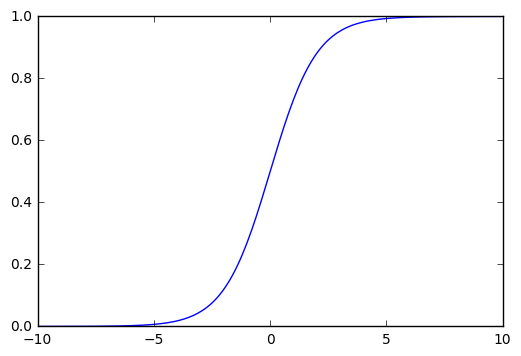

In [2]:
# sigmoid function을 한 번 그려보자
# sigmoid는 S자 모양이라는 뜻이다
# 상수 e는 2.7182...

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+exp(-x))
    
x = np.arange(-10,10,0.1)
y = sigmoid(x)

plt.plot(x,y)
plt.show()

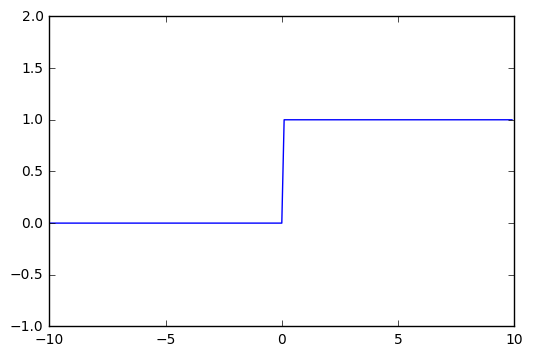

In [4]:
# step function을 그려보자
def step_function(x):
    return np.array(x>0, dtype=np.int)

x = np.arange(-10,10,0.1)
y = step_function(x)

plt.ylim(-1., 2.)
plt.plot(x,y)
plt.show()

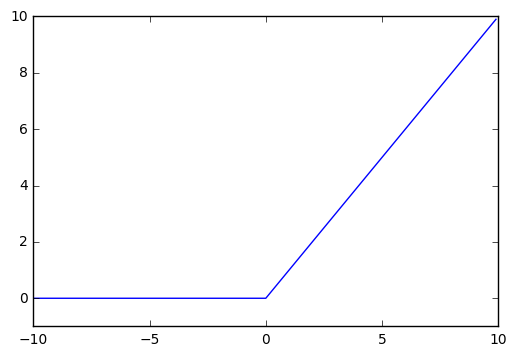

In [7]:
# ReLU function을 그려보자 
# ReLU 는 Rectified Linear Unit. 즉 변형된 선형이라는 의미

def relu(x):
    return np.maximum(0, x)

x = np.arange(-10,10,0.1)
y = relu(x)

plt.ylim(-1., 10.)
plt.plot(x,y)
plt.show()

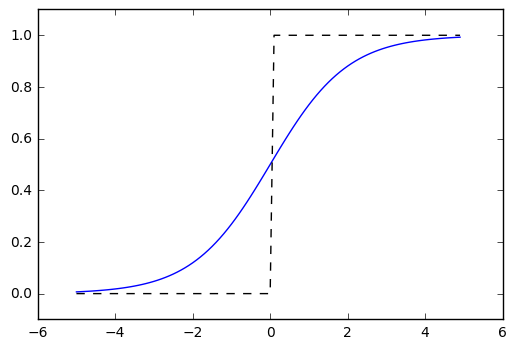

In [8]:
# ReLU와 Sigmoid 비교
x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)

plt.plot(x, y1)
plt.plot(x, y2, 'k--')
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()

## (0,1,2,) 3층으로 된 신경망을 구축해보자
- 행렬곱도 이해해보자. with broadcast

In [9]:
X = np.array([1., 0.5])  # shape 는 (2, )
W1 = np.array([[.1, .3, .5], [.2,.4,.6]]) # shape 는 (2,3)
B1 = np.array([.1,.2,.3])  # shape 는 (3, )

print(X.shape, W1.shape, B1.shape) 

A1 = np.dot(X,W1) + B1  # dot으로 해주면 (3, ) 이 되고 다시 B1 으로 더해주니 A1.shape 역시 (3, ) 이다.
print(A1.shape, A1)

(2,) (2, 3) (3,)
(3,) [ 0.3  0.7  1.1]


In [10]:
# Wx + b 라는 식이 계산되어서 A1이 나왔다
# 이것을 Activation function인 Sigmoid에 넣어보자
# 여기까지가 0 layer (= X) 를 지나 1 layer 이다

Z1 = sigmoid(A1)
print(Z1)

[ 0.57444252  0.66818777  0.75026011]


In [11]:
# 이제 2층이다. 2층에는 2층의 Weight와 Bias 가 있다
W2 = np.array([[.1, .4], [.2,.5], [.3,.6]]) # shape 는 (3,2)
B2 = np.array([.1,.2])  # shape 는 (2, )

print(Z1.shape, W2.shape, B2.shape)  # 각각 (3, ), (3,2), (2,) 이다. 연산이 가능하게 숫자가 맞다는 걸 알 수 있다. 

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)
print(Z2.shape, Z2)  # shape는 (2,) 이다

(3,) (3, 2) (2,)
(2,) [ 0.62624937  0.7710107 ]


In [13]:
# 이제 2층에서 출력층인 3층으로 신호전달 부분이다
# 이 부분은 그냥 값을 그대로 전달하게 해뒀다

def identity_function(x):
    return x

W3 = np.array([[.1, .3], [.2, .4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3  # (2,) 과 (2,2)를 행렬곱해서 (2,)가 나오고 거기에 (2,)인 B3를 더해준다
Y = identity_function(A3) # 그럼 결국 (2, )
print(A3, Y)

[ 0.31682708  0.69627909] [ 0.31682708  0.69627909]
